In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

## Data processing

In [2]:
!ls ../../datasets/*.pickle

../../datasets/df_all_2016.pickle
../../datasets/df_all_comments_parsed_2016.pickle
../../datasets/possible_botfights.pickle


In [3]:
with open("../../datasets/df_all_comments_parsed_2016.pickle", "rb") as f:
    df_all = pickle.load(f)

In [4]:
len(df_all)

921971

### Final data format

In [5]:
df_all[0:2].transpose()

,0,1
archived,False,False
language,zh,zh
page_namespace,0,0
rev_deleted,False,False
rev_id,10764032,16265305
rev_minor_edit,True,True
rev_page,796015,796015
rev_parent_id,1.0169e+07,1.62328e+07
rev_revert_offset,1,1
rev_sha1,r64h9ccp8u81sv76rchiqlopzvbjz7y,e19g7y6aw3j2k4yw3k6q0o3vn3f69i7


## Descriptive statistics

### Number of bot-bot reverts per language over time

In [6]:
gb = df_all[df_all['page_namespace']==0].groupby(["language","reverting_year"])

In [7]:
sns.set(font_scale=1.5)
gb['rev_id'].count().unstack().transpose()

language,de,en,es,fr,ja,pt,zh
reverting_year,,,,,,,
2004,6.0,2.0,NaN,2.0,284.0,1.0,5.0
2005,375.0,109.0,493.0,227.0,29.0,205.0,20.0
2006,436.0,1112.0,796.0,738.0,117.0,722.0,188.0
2007,1379.0,5490.0,1691.0,2191.0,903.0,3187.0,634.0
2008,3226.0,13319.0,3112.0,3737.0,2189.0,2702.0,2105.0
2009,4703.0,16987.0,3414.0,4347.0,3198.0,5319.0,2771.0
2010,4969.0,13512.0,7114.0,5793.0,5278.0,4850.0,4453.0
2011,10386.0,30639.0,16907.0,14403.0,7642.0,15414.0,6322.0
2012,9549.0,26229.0,9139.0,9746.0,6888.0,7936.0,5747.0


In [8]:
gb['rev_id'].count().unstack().transpose().sum()

language
de     54907.0
en    244399.0
es     67980.0
fr     56255.0
ja     34604.0
pt     60035.0
zh     43015.0
dtype: float64

In [9]:
gb['rev_id'].count().unstack().transpose().sum().sum()

561195.0

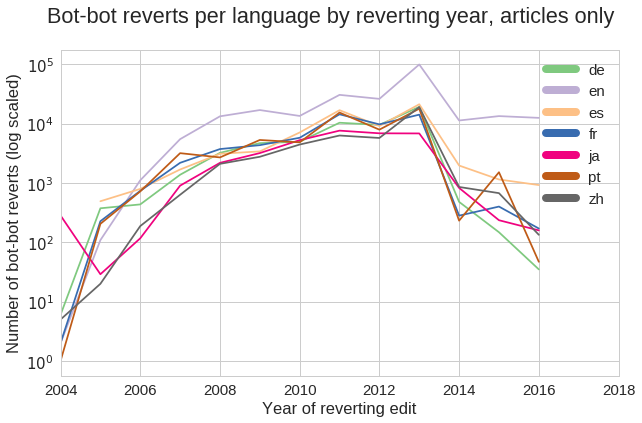

In [10]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

groupby_unstack = gb['revisions_reverted'].count().unstack().transpose()
ax = groupby_unstack.plot(kind='line', logy=True, figsize=[10,6], colormap="Accent")    

plt.xlim(2004,2018)

plt.ylabel("Number of bot-bot reverts (log scaled)")
plt.xlabel("Year of reverting edit")
plt.suptitle("Bot-bot reverts per language by reverting year, articles only")

leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

In [11]:
gb_lang_nstype = df_all.groupby(["language", "namespace_type"])

gb_lang_nstype['revisions_reverted'].count().unstack().transpose()

language,de,en,es,fr,ja,pt,zh
namespace_type,,,,,,,
article,54907,244399,67980,56255,34604,60035,43015
category,10596,105006,19128,21127,10087,9940,6717
other page,1028,108041,1544,617,277,536,1454
other talk,2388,43107,32,18534,22,358,237


In [12]:
gb_lang_nstype['revisions_reverted'].count().unstack().transpose().sum()

language
de     68919
en    500553
es     88684
fr     96533
ja     44990
pt     70869
zh     51423
dtype: int64

In [13]:
gb_lang_nstype['revisions_reverted'].count().unstack().sum()

namespace_type
article       561195
category      182601
other page    113497
other talk     64678
dtype: int64

In [14]:
df_all['namespace_type'].value_counts()

article       561195
category      182601
other page    113497
other talk     64678
Name: namespace_type, dtype: int64

In [15]:
gb_lang_nstype['revisions_reverted'].count().unstack().sum().sum()

921971

In [16]:
df_all['namespace_type'].value_counts(normalize=True)

article       0.608691
category      0.198055
other page    0.123103
other talk    0.070152
Name: namespace_type, dtype: float64

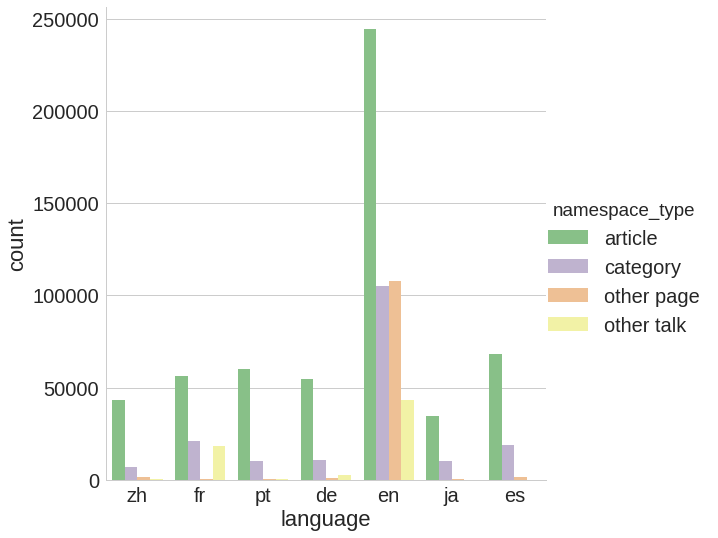

In [17]:
sns.set(font_scale=2)
sns.set_style("whitegrid")

g = sns.factorplot(data=df_all,
                   x='language',
                   y=None,
                   hue='namespace_type',
                   kind='count',
                   size=8,
                   palette="Accent",
                   aspect = 1)